In [125]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import f_oneway



pd.set_option('display.max_rows', None)

In [126]:
%store -r parameter_6
%store -r hospitals_personalInfo

In [127]:
#parameter_4
my_parameter = parameter_6

In [128]:
# Relative frequences for answers of every question

relative_frequencies = my_parameter.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,1. Επιβραβεύει το προσωπικό με καλά λόγια όταν τηρούνται οι διαδικασίες ασφαλούς φροντίδας του ασθενούς.,2. Λαμβάνει σοβαρά υπόψη του τις προτάσεις του προσωπικού για βελτίωση της ασφάλειας του ασθενούς.,"3. Παροτρύνει το προσωπικό να εργάζεται γρηγορότερα όταν υπάρχει υπερβολικός φόρτος εργασίας και πίεση, ακόμη και όταν παραβλέπονται σημαντικές διαδικασίες ασφάλειας του ασθενούς.",4. Παραβλέπει επαναλαμβανόμενα προβλήματα ασφάλειας του ασθενούς.
1.0,0.074380,0.053719,0.053942,0.033058
2.0,0.107438,0.095041,0.165975,0.090909
3.0,0.169421,0.198347,0.224066,0.148760
4.0,0.318182,0.371901,0.286307,0.309917
5.0,0.330579,0.280992,0.269710,0.417355


/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_50952/2184165003.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


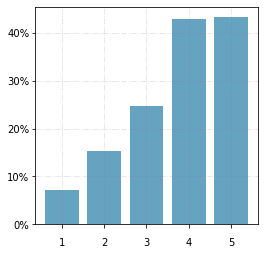

In [129]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/3
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig('distribution.png')

plt.show()

In [130]:
height

1.0    0.071700
2.0    0.153121
3.0    0.246865
4.0    0.428769
5.0    0.432878
dtype: float64

In [131]:
my_parameter.describe()

,1. Επιβραβεύει το προσωπικό με καλά λόγια όταν τηρούνται οι διαδικασίες ασφαλούς φροντίδας του ασθενούς.,2. Λαμβάνει σοβαρά υπόψη του τις προτάσεις του προσωπικού για βελτίωση της ασφάλειας του ασθενούς.,"3. Παροτρύνει το προσωπικό να εργάζεται γρηγορότερα όταν υπάρχει υπερβολικός φόρτος εργασίας και πίεση, ακόμη και όταν παραβλέπονται σημαντικές διαδικασίες ασφάλειας του ασθενούς.",4. Παραβλέπει επαναλαμβανόμενα προβλήματα ασφάλειας του ασθενούς.
count,242.000000,242.000000,241.000000,242.000000
mean,3.723140,3.731405,3.551867,3.987603
std,1.236463,1.129648,1.203470,1.110050
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


# Correlation Analysis

In [132]:
# individual score to parameter 

parameter = my_parameter

individualScore = parameter.sum(axis=1)/4


In [133]:
individualScore.describe()

count    244.000000
mean       3.714139
std        0.951226
min        0.000000
25%        3.187500
50%        3.750000
75%        4.500000
max        5.000000
dtype: float64

### Gender correlation

In [134]:
gender = hospitals_personalInfo['1. Φύλο: ']

In [135]:
# create a frame with gender and score
gender = pd.concat([gender,individualScore],axis=1)

gender = gender.dropna()

gender.columns = ['Gender','Score']

male = []
female = []


#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

In [136]:
from statistics import mean, pvariance
avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.3838028169014085 var male = 0.8306883554850228 avg female = 3.8905325443786984 var female = 0.7017742726095025


In [137]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.00010896257398800692 T-Statistic:4.000527784966311


In [138]:
#create table for every category

# for index, row in gender.iterrows(): 
#     if row['Gender'] == 'Γυναίκα':
#         gender["Gender"].loc[index] = 0
#     elif row['Gender'] == 'Άνδρας':
#         gender["Gender"].loc[index] = 1

    

### Age Correlation

In [139]:
age = hospitals_personalInfo['2. Ηλικία…']

In [140]:
# create a frame with age and score
age = pd.concat([age,individualScore],axis=1)
age.columns = ['Age','Score']
age = age.dropna()

In [141]:
# remove outliers
q = age['Age'].quantile(0.99)
age = age[age['Age'] < q]

In [142]:

x = age['Age']
y = age['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))



(corr,p-val) = (0.11831677616909123, 0.07331223980725193)


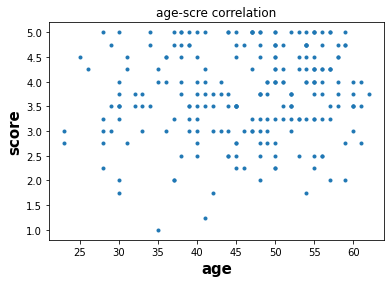

In [143]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Proffesion correlation

In [144]:
profession = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']

profession= pd.concat([profession,individualScore],axis=1)

profession.columns = ['Profession','Score']

profession = profession.dropna()

In [145]:
print("Mean")
profession.groupby('Profession')['Score'].mean()

Mean


Profession
1. Ειδικευόμενος ιατρός    3.305556
2. Ειδικός ιατρός          3.480263
3. ΠΕ Νοσηλευτής           3.970588
4. ΤΕ Νοσηλευτής           3.878731
5. ΔΕ Βοηθός Νοσηλευτή     3.911765
Name: Score, dtype: float64

In [146]:
print("Variance")
profession.groupby('Profession')['Score'].var()

Variance


Profession
1. Ειδικευόμενος ιατρός    0.876603
2. Ειδικός ιατρός          0.953992
3. ΠΕ Νοσηλευτής           0.694393
4. ΤΕ Νοσηλευτής           0.669864
5. ΔΕ Βοηθός Νοσηλευτή     0.874540
Name: Score, dtype: float64

In [147]:
eidikevomenos_iatros = []
eidikos_iatros = []
pe_nosileftis = []
te_nosileftis = []
de_voithos_nosilefti = []

#create table for every category of profession
for index, row in profession.iterrows(): 
    if row['Profession'] == '1. Ειδικευόμενος ιατρός':
        eidikevomenos_iatros.append(row['Score'])
    elif row['Profession'] == '2. Ειδικός ιατρός':
        eidikos_iatros.append(row['Score'])
    elif row['Profession'] == '3. ΠΕ Νοσηλευτής':
        pe_nosileftis.append(row['Score'])
    elif row['Profession'] == '4. ΤΕ Νοσηλευτής':
        te_nosileftis.append(row['Score'])
    else:
        de_voithos_nosilefti.append(row['Score'])
        


In [148]:
f_oneway(eidikevomenos_iatros, eidikos_iatros, pe_nosileftis,te_nosileftis,de_voithos_nosilefti)

F_onewayResult(statistic=3.8316096723853144, pvalue=0.00491783644756588)

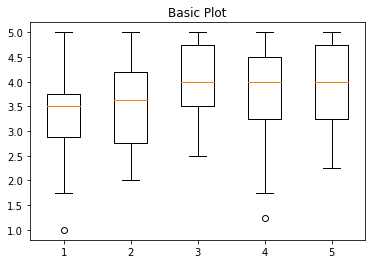

In [149]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([eidikevomenos_iatros,eidikos_iatros,pe_nosileftis,te_nosileftis,de_voithos_nosilefti])

plt.show()



### Education Correlation

In [150]:
education = hospitals_personalInfo['3α. Ποια είναι η βασική σας εκπαίδευση;']

education= pd.concat([education,individualScore],axis=1)

education.columns = ['Education','Score']

education = education.dropna()

In [151]:
print("Mean")
education.groupby('Education')['Score'].mean()

Mean


Education
1. Δευτεροβάθμια (Δ.Ε.)     4.033333
2. Τεχνολογική (Τ.Ε.)       3.856115
3. Πανεπιστημιακή (Π.Ε.)    3.509036
Name: Score, dtype: float64

In [152]:
print("Variance")
education.groupby('Education')['Score'].var()

Variance


Education
1. Δευτεροβάθμια (Δ.Ε.)     0.829167
2. Τεχνολογική (Τ.Ε.)       0.693821
3. Πανεπιστημιακή (Π.Ε.)    0.900070
Name: Score, dtype: float64

In [153]:
defterovathmia = []
texnologiki = []
panepistimiaki = []


#create table for every category of profession
for index, row in education.iterrows(): 
    if row['Education'] == '1. Δευτεροβάθμια (Δ.Ε.)':
        defterovathmia.append(row['Score'])
    elif row['Education'] == '2. Τεχνολογική (Τ.Ε.)':
        texnologiki.append(row['Score'])
    elif row['Education'] == '3. Πανεπιστημιακή (Π.Ε.)':
        panepistimiaki.append(row['Score'])

        

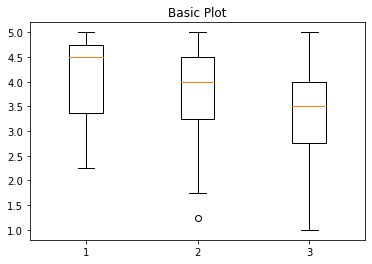

In [154]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([defterovathmia,texnologiki,panepistimiaki])

plt.show()

In [155]:
f_oneway(defterovathmia,texnologiki,panepistimiaki)

F_onewayResult(statistic=4.898270835471437, pvalue=0.008242008387671192)

### Adverse Event

In [156]:
aevent = hospitals_personalInfo['Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)']

In [157]:
# create a frame with age and score
aevent = pd.concat([aevent,individualScore],axis=1)
aevent.columns = ['aevent','Score']
aevent = aevent.dropna()

In [158]:
# remove outliers
q = aevent['aevent'].quantile(0.99)
aevent = aevent[aevent['aevent'] < q]

In [159]:

x = aevent['aevent']
y = aevent['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))


(corr,p-val) = (-0.1550830613869936, 0.027537251353377753)


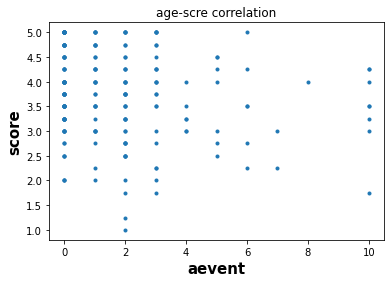

In [160]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("aevent",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Years of work in the team

In [161]:
wyears = hospitals_personalInfo['8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?']

In [162]:
# create a frame with years and score
wyears = pd.concat([wyears,individualScore],axis=1)
wyears.columns = ['wyears','Score']
wyears = wyears.dropna()



In [163]:
# remove outlie
q = wyears['wyears'].quantile(0.99)
wyears = wyears[wyears['wyears'] < q]

In [164]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.026693639921327263, 0.6911097755251241)


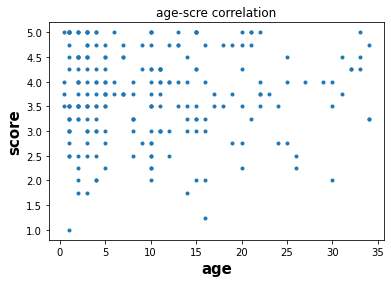

In [165]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Years of work in the hospital


In [166]:
wyears = hospitals_personalInfo['7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;']

In [167]:
# create a frame with years and score
wyears = pd.concat([wyears,individualScore],axis=1)
wyears.columns = ['wyears','Score']
wyears = wyears.dropna()



In [168]:
# remove outliers
q = wyears['wyears'].quantile(0.99)
wyears = wyears[wyears['wyears'] < q]

In [169]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.22472305833393455, 0.0005634886829149851)


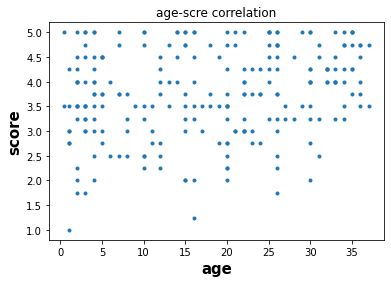

In [170]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Hours of Work in the hopital

In [171]:
whours = hospitals_personalInfo['9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']

In [172]:
# create a frame with hours and score
whours = pd.concat([whours,individualScore],axis=1)
whours.columns = ['whours','Score']
whours = whours.dropna()


In [173]:
# remove outliers
q = whours['whours'].quantile(0.99)
whours = whours[whours['whours'] < q]

In [174]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.22472305833393455, 0.0005634886829149851)


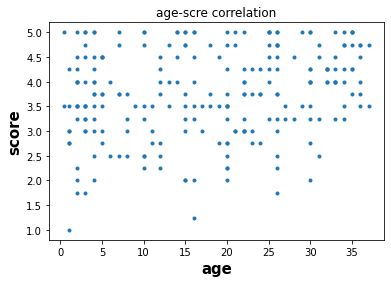

In [175]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

## Multivariant linear Regression for score and variables with evidece of correlation

In [176]:
hospitals_personalInfo

,Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό),1. Φύλο:,2. Ηλικία…,3α. Ποια είναι η βασική σας εκπαίδευση;,3β. Άλλες σπουδές:,7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;,8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?,9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …,10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;
0,4.0,Γυναίκα,23.0,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,23.0,12.0,23.0,4. ΤΕ Νοσηλευτής
1,NaN,Γυναίκα,45.0,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,23.0,NaN,12.0,4. ΤΕ Νοσηλευτής
2,10.0,Άνδρας,55.0,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33.0,3.0,60.0,4. ΤΕ Νοσηλευτής
3,NaN,Άνδρας,61.0,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,30.0,30.0,NaN,NaN
4,2.0,Άνδρας,50.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,25.0,11.0,41.0,4. ΤΕ Νοσηλευτής
5,NaN,Γυναίκα,48.0,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,15.0,15.0,52.0,2. Ειδικός ιατρός
6,6.0,Άνδρας,55.0,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33.0,11.0,40.0,4. ΤΕ Νοσηλευτής
7,NaN,Γυναίκα,39.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,10.0,9.0,40.0,4. ΤΕ Νοσηλευτής
8,NaN,Γυναίκα,40.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,14.0,2.0,50.0,4. ΤΕ Νοσηλευτής
9,NaN,Γυναίκα,55.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,26.0,3.0,45.0,4. ΤΕ Νοσηλευτής


In [177]:
data = hospitals_personalInfo[['1. Φύλο: ','2. Ηλικία…','Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)','7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;','10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;','9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']]
data = pd.concat((data, individualScore), axis=1)
data.columns = ['gender','age','aevent','yearsHospital','position','hours','score']


In [178]:
#clean data
data = data.dropna()
data

,gender,age,aevent,yearsHospital,position,hours,score
0,Γυναίκα,23.0,4.0,23.0,4. ΤΕ Νοσηλευτής,23.0,3.00
2,Άνδρας,55.0,10.0,33.0,4. ΤΕ Νοσηλευτής,60.0,4.00
4,Άνδρας,50.0,2.0,25.0,4. ΤΕ Νοσηλευτής,41.0,4.25
6,Άνδρας,55.0,6.0,33.0,4. ΤΕ Νοσηλευτής,40.0,4.25
12,Άνδρας,51.0,2.0,25.0,4. ΤΕ Νοσηλευτής,40.0,4.00
13,Γυναίκα,54.0,2.0,30.0,4. ΤΕ Νοσηλευτής,40.0,4.00
14,Γυναίκα,57.0,2.0,35.0,4. ΤΕ Νοσηλευτής,40.0,5.00
15,Γυναίκα,52.0,3.0,20.0,3. ΠΕ Νοσηλευτής,40.0,5.00
17,Άνδρας,50.0,3.0,30.0,4. ΤΕ Νοσηλευτής,40.0,2.75
18,Άνδρας,53.0,10.0,30.0,4. ΤΕ Νοσηλευτής,60.0,4.25


In [179]:
#remove outliers
q1 = data['aevent'].quantile(0.99)
data = data.loc[data['aevent'] < q1]

q2 = data['yearsHospital'].quantile(0.99)
data = data.loc[data['yearsHospital'] < q2]

q3 = data['hours'].quantile(0.99)
data = data.loc[data['hours'] < q2]

print(q3)

75.0


In [180]:
#make categorical values binary

dummies = pd.get_dummies(data['gender'])
data = pd.concat((data, dummies), axis=1)

dummies = pd.get_dummies(data['position'])
data = pd.concat((data, dummies), axis=1)


In [181]:
data

,gender,age,aevent,yearsHospital,position,hours,score,Άνδρας,Γυναίκα,1. Ειδικευόμενος ιατρός,2. Ειδικός ιατρός,4. ΤΕ Νοσηλευτής,5. ΔΕ Βοηθός Νοσηλευτή
0,Γυναίκα,23.0,4.0,23.0,4. ΤΕ Νοσηλευτής,23.0,3.00,0,1,0,0,1,0
26,Γυναίκα,48.0,0.0,15.0,4. ΤΕ Νοσηλευτής,7.0,5.00,0,1,0,0,1,0
50,Γυναίκα,40.0,1.0,12.0,4. ΤΕ Νοσηλευτής,25.0,4.50,0,1,0,0,1,0
96,Γυναίκα,46.0,6.0,10.0,2. Ειδικός ιατρός,35.0,2.25,0,1,0,1,0,0
103,Γυναίκα,38.0,2.0,10.0,4. ΤΕ Νοσηλευτής,8.0,2.50,0,1,0,0,1,0
129,Άνδρας,51.0,1.0,27.0,4. ΤΕ Νοσηλευτής,24.0,3.50,1,0,0,0,1,0
142,Γυναίκα,35.0,2.0,1.0,1. Ειδικευόμενος ιατρός,10.0,1.00,0,1,1,0,0,0
150,Γυναίκα,45.0,2.0,9.0,2. Ειδικός ιατρός,36.0,3.50,0,1,0,1,0,0
154,Γυναίκα,37.0,0.0,7.0,2. Ειδικός ιατρός,16.0,4.75,0,1,0,1,0,0
164,Άνδρας,30.0,2.0,4.0,1. Ειδικευόμενος ιατρός,35.0,3.75,1,0,1,0,0,0


In [182]:
# build model
X = data[['age','Άνδρας','aevent','1. Ειδικευόμενος ιατρός','hours']]
y = data['score']

In [183]:
#ols model
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1.439
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.280
Time:                        09:38:39   Log-Likelihood:                -20.940
No. Observations:                  18   AIC:                             53.88
Df Residuals:                      12   BIC:                             59.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
